let's use this outline as a tool to track the project as we work through the analysis. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from pathlib import Path

# from google.colab import drive

import os

In [ ]:
# drive.mount('/content/gdrive')
# wine_df = pd.read_csv('gdrive/My Drive/resources/winedata.csv')
# # wine_df = pd.read_csv('gdrive/My Drive/winedata.csv')

In [2]:
winedata_df = pd.read_csv(os.path.join("resources","winedata.csv"))
winedata_df.head()

,type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


I. Determine the big picture:

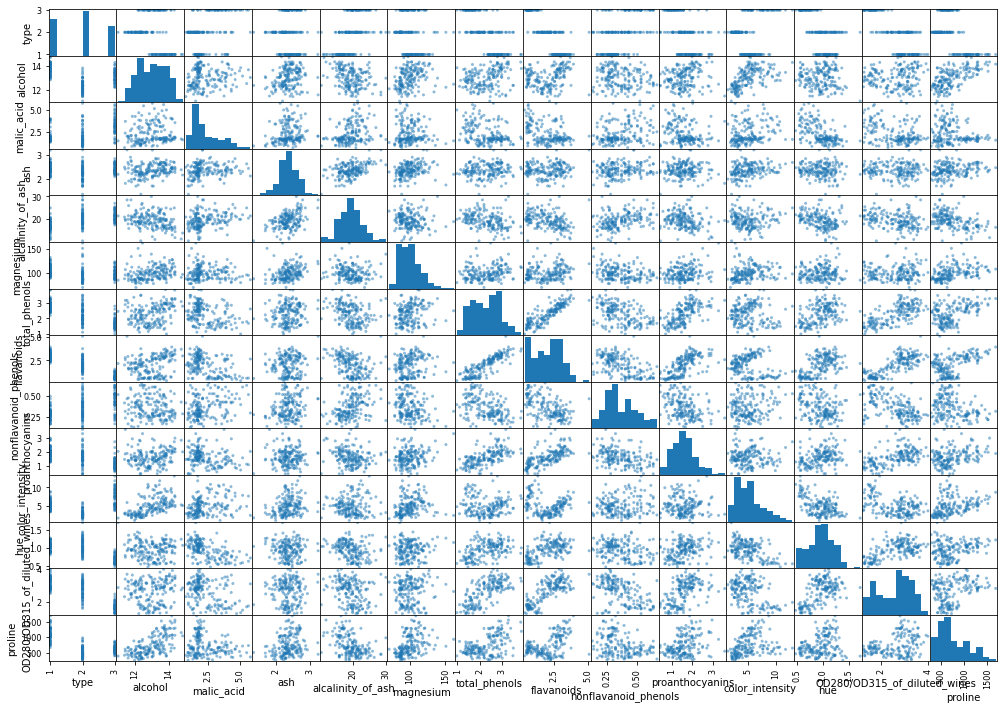

In [3]:
# https://www.marsja.se/pandas-scatter-matrix-pair-plot/
from pandas.plotting import scatter_matrix
# attributes =wine_df["catergories", "alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"])
pd.plotting.scatter_matrix(winedata_df, figsize=(17,12))
plt.show()

II. Get the Data:

In [4]:
# drop type column - this is what we are trying to discover
wine_cols=winedata_df.drop(columns=['type'])

In [ ]:
# wine_cols.insert(0, 'class', 'class'=='0')
# print(wine_cols)

In [ ]:
# print(wine_cols)

III. Explore and Visualize Data for Preliminary Analysis:

In [5]:
wine_df = wine_cols

In [ ]:
# wine_df=winedata_df

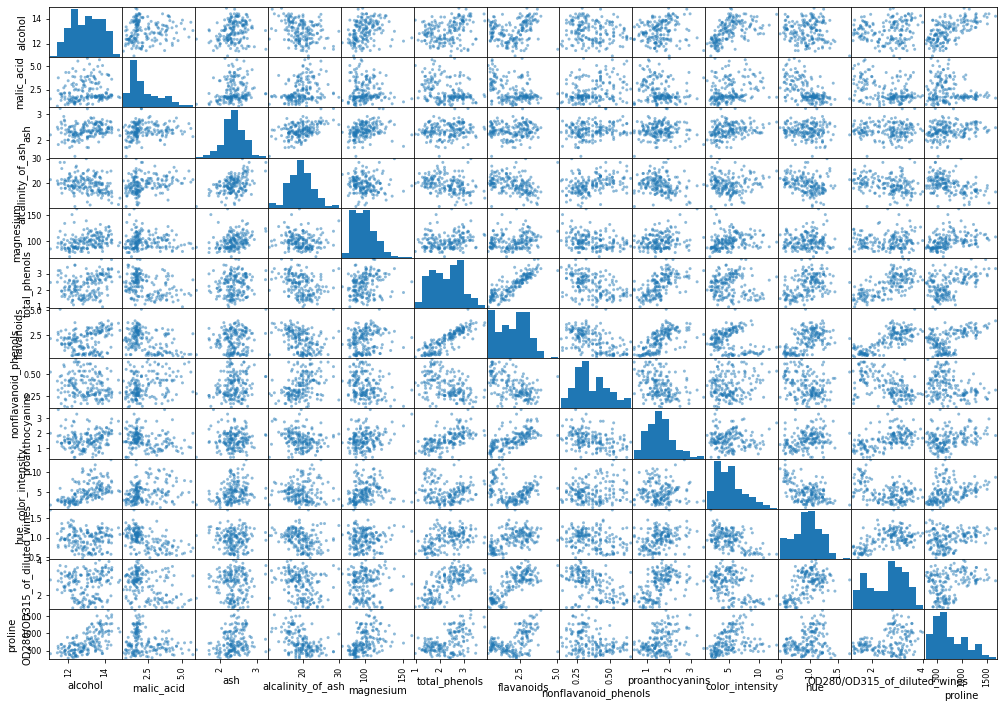

In [6]:
# https://www.marsja.se/pandas-scatter-matrix-pair-plot/
from pandas.plotting import scatter_matrix
# attributes =wine_df["catergories", "alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"])
pd.plotting.scatter_matrix(wine_df, figsize=(17,12))
plt.show()

IV. Prepare Data for Machine Learning:

using the histogram above we can see that the two values with rightward slopes indictating correlation are total_phenols and flavanoids. Since flavanoids seem to have multiple intersections with rightward slopes it is probably the better candidate for y. 

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# # y = winedata_df["type"]
# y = winedata_df["alcohol"]
# # y = winedata_df["malic_acid"]
# y = winedata_df["ash"]
# y = winedata_df["alcaninity_of_ash"]
# y = winedata_df["magnesium"]
# y = winedata_df["total_phenols"]
# y = winedata_df["flavanoids"]
# y = winedata_df["proanthocyanins"]
# y = winedata_df["color_intensity"]
# y = winedata_df["hue"]
# y = winedata_df["OD280/od315_of_diluted_wines"]
# y = winedata_df["proline"]

# print("Shape", X.shape, y.shape)

In [ ]:
# X = winedata_df[["malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["alcohol"]
# # https://www.statology.org/valueerror-unknown-label-type-continuous/

# lab = preprocessing.LabelEncoder()
# y_transformed = lab.fit_transform(y)

# print("Shape", X.shape, y.shape)

In [ ]:
# X = winedata_df[["alcohol", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["malic_acid"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["ash"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["alcaninity_of_ash"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["magnesium"]


In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["total_phenols"]

In [7]:
X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "nonflavanoid_phenols",
            "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
pre_y = winedata_df["flavanoids"]

# #label encoder makes y a binary for logistic regression
lab = preprocessing.LabelEncoder()
y= lab.fit_transform(pre_y)

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "color_intensity", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["proanthocyanins"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "hue", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["color_intensity"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "OD280/OD315_of_diluted_wines","proline"]]
# y = winedata_df["hue"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue","proline"]]
# y = winedata_df["OD280/od315_of_diluted_wines"]

In [ ]:
# X = winedata_df[["alcohol", "malic_acid", "ash", "alcalinity_of_ash",  "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
#             "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines"]]
# y = winedata_df["proline"]

V. Select Model and Train It

In [8]:
from sklearn.model_selection import train_test_split
# https://www.statology.org/valueerror-unknown-label-type-continuous/
# removed y_transformed
# X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, random_state=30)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier

LogisticRegression()

In [17]:
# #Both scalers to test A/B
scaler = StandardScaler(). fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 1.05084381, -0.44513784,  0.81959858, ..., -0.33948861,
         1.38696679,  1.06293629],
       [ 0.3140701 , -0.37386219,  1.15500353, ...,  0.49051112,
         0.34731168,  1.60096949],
       [ 0.15173013, -0.02639342,  1.11773632, ...,  0.31577433,
         0.82382027,  1.33963908],
       ...,
       [ 0.83855308,  2.90481746,  0.29785753, ..., -1.38790932,
        -1.24105028, -0.02850247],
       [ 0.86352846,  1.75549769, -0.4102196 , ..., -0.77633058,
        -1.22661063, -0.70488705],
       [ 0.01436554, -0.65896477,  0.67052971, ...,  0.7089321 ,
        -0.12919691,  1.09368105]])

In [10]:
# #Both scalers to test A/B
# scaler = MinMaxScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_train_scaled

array([[0.76612903, 0.22727273, 0.58169935, ..., 0.32520325, 0.83763838,
        0.58273894],
       [0.60752688, 0.243083  , 0.64052288, ..., 0.4796748 , 0.57195572,
        0.70756063],
       [0.57258065, 0.3201581 , 0.63398693, ..., 0.44715447, 0.69372694,
        0.64693295],
       ...,
       [0.72043011, 0.97035573, 0.49019608, ..., 0.1300813 , 0.16605166,
        0.32952924],
       [0.72580645, 0.71541502, 0.36601307, ..., 0.24390244, 0.1697417 ,
        0.17261056],
       [0.54301075, 0.1798419 , 0.55555556, ..., 0.5203252 , 0.4501845 ,
        0.58987161]])

In [18]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-6.05606023e-02, -6.41145859e-01,  8.56865794e-01,
         3.24275736e+00,  2.73959447e+00,  1.60336522e+00,
        -1.25793233e+00,  6.18659306e-01, -7.58976043e-01,
         1.53893183e+00,  1.30032886e+00,  7.24744002e-01],
       [ 5.76311592e-01, -5.16413481e-01,  8.94133011e-01,
         9.90389484e-02, -2.86818660e-01,  3.95297002e-01,
        -6.80734201e-01,  1.01814534e-01, -6.82768349e-01,
         7.08932101e-01,  1.76239780e+00,  2.94317448e-01],
       [ 4.51434691e-01,  1.96932462e+00,  1.82581344e+00,
         1.67089815e+00,  8.39288550e-01, -4.67608868e-01,
        -7.63191077e-01, -8.45734215e-01,  1.54966878e+00,
        -1.25685674e+00, -9.81136505e-01, -3.66694760e-01],
       [-1.59654648e+00,  2.58709153e-01,  2.04941675e+00,
         9.90389484e-02,  2.05853245e-01, -8.28460414e-01,
         1.95788580e+00, -9.49103170e-01, -5.57249796e-01,
         1.18945826e+00, -1.43636560e-01, -4.37407694e-01],
       [ 1.64217819e-01,  1.78524053e-01, -2.8020464

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [20]:
classifier.fit(X_train, y_train)

/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# #Coninuous Error occurred, commented out
classifier.fit(X_train, y_train)

/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_train, y_test)}")

Training Data Score: 0.16541353383458646


In [ ]:
# print(f"Testing Data Score: {classifier.score(X_train, y_test)}")

K-Nearest Neighbor Analysis

In [24]:
from sklearn.preprocessing import StandardScaler
X_scaler=StandardScaler().fit(X_train)

In [25]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.022
k: 3, Train/Test Score: 0.316/0.000
k: 5, Train/Test Score: 0.180/0.000
k: 7, Train/Test Score: 0.150/0.000
k: 9, Train/Test Score: 0.143/0.000
k: 11, Train/Test Score: 0.128/0.000
k: 13, Train/Test Score: 0.150/0.000
k: 15, Train/Test Score: 0.150/0.000
k: 17, Train/Test Score: 0.143/0.000
k: 19, Train/Test Score: 0.120/0.000


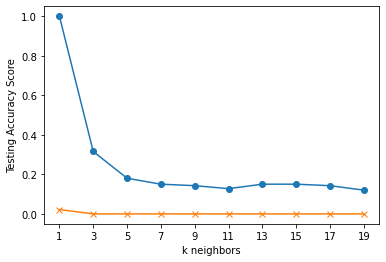

In [26]:
train_scores = []
test_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1,20,2), train_scores, marker='o')
plt.plot(range(1,20,2), test_scores, marker = 'x')

loc, labels = plt.xticks()

plt.xticks(np.arange(1, max(loc), step=2))

plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc:%.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc:0.000


In [28]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [29]:
confusion_matrix(y_true, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00       2.0
          22       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       1.0
          30       0.00    

/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ABS/opt/anaconda3/lib/pyth

Random Forest Classifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
clf = RandomForestClassifier(random_state=1, n_estimators=5000). fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.022222222222222223


In [33]:
feature_importances = clf.feature_importances_

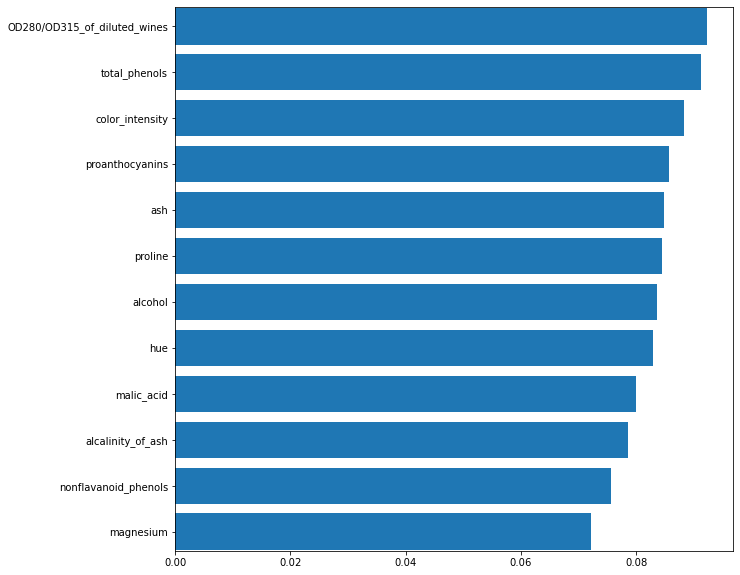

In [34]:
feature_importances = clf.feature_importances_
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [35]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True, False,  True, False, False,  True, False,  True,  True,
       False,  True,  True])

In [36]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled= scaler.transform(X_selected_test)

/Users/ABS/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [37]:
clf = LogisticRegression(). fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8721804511278195
Testing Score: 0.022222222222222223


In [38]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.518796992481203
Testing Score: 0.0


VI. Fine Tune Model

VII.Present Solution

VIII. Launch System